IMPORTS

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt


2 ways to download iris dataset

In [4]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -o ./DataSet/iris.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4551  100  4551    0     0   6812      0 --:--:-- --:--:-- --:--:--  6812


In [5]:
# from sklearn import datasets
# iris = datasets.load_iris()

In [6]:
# import pandas as pd
# irisdf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,sep=',')

put it in dataframe

In [7]:
irisdf = pd.read_csv('./DataSet/iris.data',header=None,sep=',')
irisdf.columns = ['Sepal_L', 'Sepal_W', 'Petal_L','Petal_W','Species']

First 12 lines and last 12 lines

In [8]:
irisdf.head(12)
irisdf.tail(12)

,Sepal_L,Sepal_W,Petal_L,Petal_W,Species
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


Some usefull informations about dataset

In [9]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_L    150 non-null float64
Sepal_W    150 non-null float64
Petal_L    150 non-null float64
Petal_W    150 non-null float64
Species    150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
irisdf.describe()

,Sepal_L,Sepal_W,Petal_L,Petal_W
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nb of Species

In [11]:
irisdf['Species'].nunique()

3

In [12]:
irisdf['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
irisdf['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
len(irisdf[irisdf['Species']=='Iris-versicolor'])

50

Export to csv then reimport...

In [15]:
versicolor = irisdf[irisdf['Species']=='Iris-versicolor']
setosa = irisdf[irisdf['Species']=='Iris-setosa']
virginica = irisdf[irisdf['Species']=='Iris-virginica']

In [16]:
def tocsv(arrdf,filenames):
    for idx,df in enumerate(arrdf):
        df.to_csv('./DataSet/%s' % filenames[idx])
        
arr_dataframes = [versicolor, setosa, virginica]
arr_filenames = ['versicolor.csv', 'setosa.csv', 'virginica.csv']

tocsv(arr_dataframes,arr_filenames)

In [17]:
import os

def check_file_exists(filenames):
    for file in filenames:
        if os.path.exists('./DataSet/%s' % file):
            print("File %s exists" % file)
        else:
            print("File %s does not exists" % file)
            
check_file_exists(arr_filenames)

File versicolor.csv exists
File setosa.csv exists
File virginica.csv exists


In [18]:
def read_files(filenames):
    df = []
    for file in filenames:
        df.append(pd.read_csv('./DataSet/%s' % file,index_col = 0))
    res = pd.concat(df,axis=0).reset_index(drop=True)
    return res

df = read_files(arr_filenames)

Create histograms for each parameters

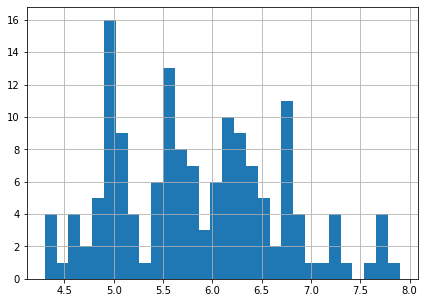

In [19]:
df['Sepal_L'].hist(bins=30, figsize=(7,5))

Or all together

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA14DE3128>,
      dtype=object)

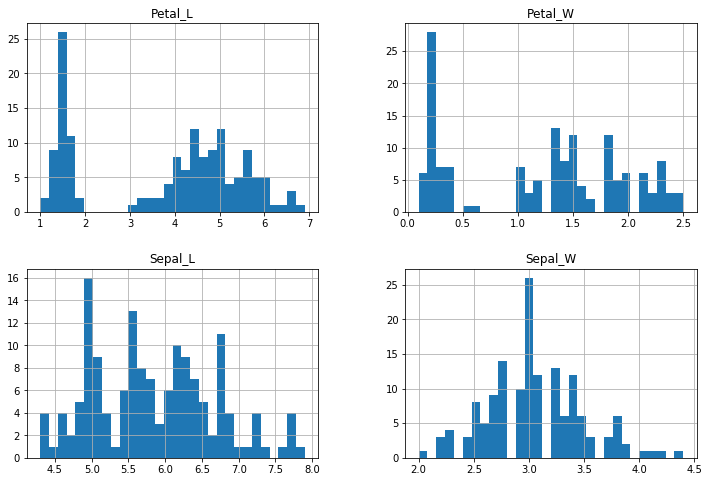

In [20]:
df.hist(bins=30, figsize=(12,8))

Correlation Matrix

In [21]:
df.corr()

,Sepal_L,Sepal_W,Petal_L,Petal_W
Sepal_L,1.000000,-0.109369,0.871754,0.817954
Sepal_W,-0.109369,1.000000,-0.420516,-0.356544
Petal_L,0.871754,-0.420516,1.000000,0.962757
Petal_W,0.817954,-0.356544,0.962757,1.000000


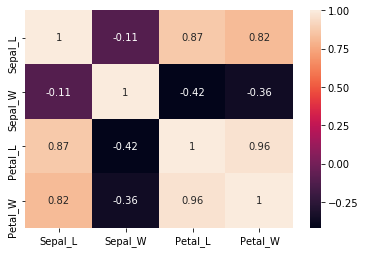

In [22]:
sns.heatmap(df.corr(),annot=True)
# if string correlation --> PCA to reduce dimension

------

TODO: compare clustering vs classification

------

In [26]:
print(df['Petal_W'].mean())
df[df['Petal_W']>=df['Petal_W'].mean()]

1.1986666666666668


,Sepal_L,Sepal_W,Petal_L,Petal_W,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
